11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8677 - loss: 0.4531 - val_accuracy: 0.9705 - val_loss: 0.1061
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9673 - loss: 0.1080 - val_accuracy: 0.9732 - val_loss: 0.0924
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9778 - loss: 0.0750 - val_accuracy: 0.9757 - val_loss: 0.0880
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0513 - val_accuracy: 0.9775 - val_loss: 0.0736
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9864 - loss: 0.0408 - val_accuracy: 0.9802 - val_loss: 0.0725
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9894 - loss: 0.0317 - val_accuracy: 0.9777 - val_loss: 0.0794
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9931 - loss: 0.0223 - val_accuracy: 0.9765 - val_loss: 0.0869
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9932 - loss: 0.0204 - 

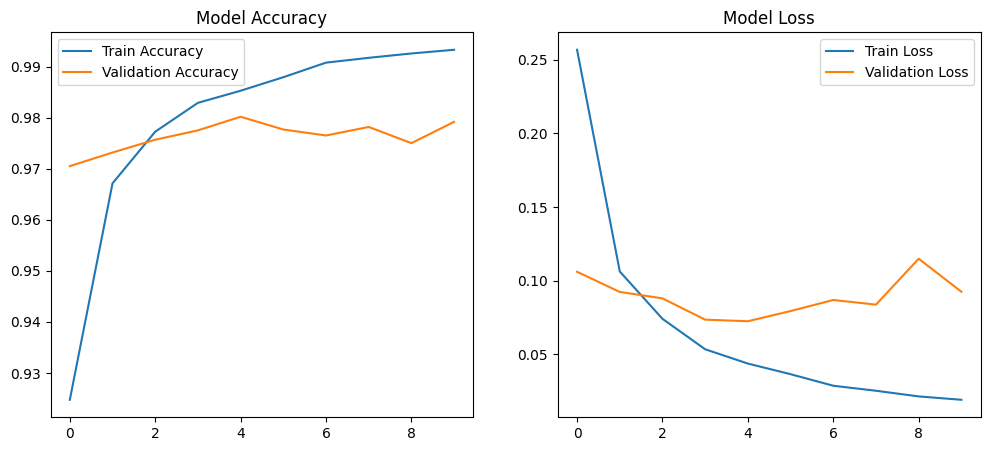

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


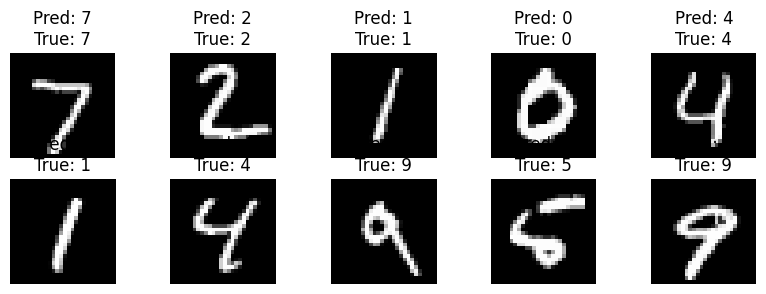

In [ ]:
# 🎯 MNIST Handwritten Digit Recognition using Artificial Neural Network

# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Step 3: Build the ANN model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Step 7: Plot accuracy and loss graphs
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Step 8: Show sample predictions
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {pred_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.show()
